# Predicting Dyslexia using Machine Learning
This module is developed to predict whether or not an individual has dyslexia or not.

In [1]:
#importing all tools necessary for the effective running of the module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,plot_roc_curve

In [2]:
#Load data to dyslexia
dyslexia=pd.read_csv("Dyt-desktop.csv",delimiter=";")

## Information on each column
Gender - Gender of individual
<br>Nativelang - Native language of individual
<br>Otherlang - Whether or not the individual speaks another language
<br>Age - Age of individual
<br>Clicks - Total number of words used to test the individual
<br>Hits and Score - Number of words that the individual had right
<br>Misses - Number of words that the individual missed
<br>Accuracy - Percentage of corrected identified words
<br>Missrate - Percentage of incorrected identified words
<br>Dyslexia - Indicates whether or not an individual has dyslexia

In [3]:
#View entire column of dataset
pd.set_option('display.max_columns', None)

In [4]:
dyslexia

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,Clicks2,Hits2,Misses2,Score2,Accuracy2,Missrate2,Clicks3,Hits3,Misses3,Score3,Accuracy3,Missrate3,Clicks4,Hits4,Misses4,Score4,Accuracy4,Missrate4,Clicks5,Hits5,Misses5,Score5,Accuracy5,Missrate5,Clicks6,Hits6,Misses6,Score6,Accuracy6,Missrate6,Clicks7,Hits7,Misses7,Score7,Accuracy7,Missrate7,Clicks8,Hits8,Misses8,Score8,Accuracy8,Missrate8,Clicks9,Hits9,Misses9,Score9,Accuracy9,Missrate9,Clicks10,Hits10,Misses10,Score10,Accuracy10,Missrate10,Clicks11,Hits11,Misses11,Score11,Accuracy11,Missrate11,Clicks12,Hits12,Misses12,Score12,Accuracy12,Missrate12,Clicks13,Hits13,Misses13,Score13,Accuracy13,Missrate13,Clicks14,Hits14,Misses14,Score14,Accuracy14,Missrate14,Clicks15,Hits15,Misses15,Score15,Accuracy15,Missrate15,Clicks16,Hits16,Misses16,Score16,Accuracy16,Missrate16,Clicks17,Hits17,Misses17,Score17,Accuracy17,Missrate17,Clicks18,Hits18,Misses18,Score18,Accuracy18,Missrate18,Clicks19,Hits19,Misses19,Score19,Accuracy19,Missrate19,Clicks20,Hits20,Misses20,Score20,Accuracy20,Missrate20,Clicks21,Hits21,Misses21,Score21,Accuracy21,Missrate21,Clicks22,Hits22,Misses22,Score22,Accuracy22,Missrate22,Clicks23,Hits23,Misses23,Score23,Accuracy23,Missrate23,Clicks24,Hits24,Misses24,Score24,Accuracy24,Missrate24,Clicks25,Hits25,Misses25,Score25,Accuracy25,Missrate25,Clicks26,Hits26,Misses26,Score26,Accuracy26,Missrate26,Clicks27,Hits27,Misses27,Score27,Accuracy27,Missrate27,Clicks28,Hits28,Misses28,Score28,Accuracy28,Missrate28,Clicks29,Hits29,Misses29,Score29,Accuracy29,Missrate29,Clicks30,Hits30,Misses30,Score30,Accuracy30,Missrate30,Clicks31,Hits31,Misses31,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,Male,No,Yes,7,10,10,0,10,1.0,0.0,5,5,0,5,1.00,0.00,6,6,0,6,1.0,0.0,2,2,0,2,1.0,0.0,3,3,0,3,1.0,0.0,4,1,3,1,0.25,0.75,5,5,0,5,1.000000,0.000000,4,3,1,3,0.750000,0.250000,1,0,1,0,0.0,1.0,1,1,0,1,1.000000,0.000000,3,1,2,1,0.333333,0.666667,3,3,0,3,1.0,0.0,3,3,0,3,1.00,0.00,4,4,0,4,1.0,0.0,2,2,0,2,1.0,0.0,2,2,0,2,1.00,0.00,3,3,0,3,1.0,0.0,2,2,0,2,1.00,0.00,4,3,1,3,0.750000,0.250000,5,1,4,1,0.200000,0.800000,3,1,2,1,0.333333,0.666667,4,1,3,1,0.250000,0.750000,4,3,1,3,0.750000,0.250000,3,2,1,2,0.666667,0.333333,3,3,0,3,1.00,0.00,5,3,2,3,0.600000,0.400000,9,1,1,1,0.111111,0.111111,6,2,0,2,0.333333,0.000000,4,1,1,1,0.25,0.25,14,1,2,1,0.071429,0.142857,18,0,0,0,0.000000,0.00,17,2,0,2,0.117647,0.000000,No
1,Female,Yes,Yes,13,12,12,0,12,1.0,0.0,11,11,0,11,1.00,0.00,10,10,0,10,1.0,0.0,4,4,0,4,1.0,0.0,5,5,0,5,1.0,0.0,5,5,0,5,1.00,0.00,5,4,1,4,0.800000,0.200000,6,5,1,5,0.833333,0.166667,5,4,1,4,0.8,0.2,10,10,0,10,1.000000,0.000000,5,4,1,4,0.800000,0.200000,5,5,0,5,1.0,0.0,4,4,0,4,1.00,0.00,10,10,0,10,1.0,0.0,5,5,0,5,1.0,0.0,4,4,0,4,1.00,0.00,4,4,0,4,1.0,0.0,4,3,1,3,0.75,0.25,8,3,5,3,375.000000,625.000000,3,1,2,1,0.333333,0.666667,3,1,2,1,0.333333,0.666667,9,7,2,7,0.777778,0.222222,6,5,1,5,0.833333,0.166667,3,2,1,2,0.666667,0.333333,5,5,0,5,1.00,0.00,12,8,4,8,0.666667,0.333333,16,2,1,2,125.000000,0.062500,9,2,1,2,0.222222,0.111111,5,0,2,0,0.00,0.40,17,2,2,2,0.117647,0.117647,35,4,0,4,0.114286,0.00,26,2,2,2,0.076923,0.076923,Yes
2,Female,No,Yes,7,6,6,0,6,1.0,0.0,6,6,0,6,1.00,0.00,6,6,0,6,1.0,0.0,3,3,0,3,1.0,0.0,4,4,0,4,1.0,0.0,2,2,0,2,1.00,0.00,7,5,2,5,0.714286,0.285714,5,3,2,3,0.600000,0.400000,3,3,0,3,1.0,0.0,7,5,2,5,0.714286,0.285714,6,5,1,5,0.833333,0.166667,6,6,0,6,1.0,0.0,3,3,0,3,1.00,0.00,6,6,0,6,1.0,0.0,3,3,0,3,1.0,0.0,4,4,0,4,1.00,0.00,2,2,0,2,1.0,0.0,2,1,1,1,0.50,0.50,5,4,1,4,0.800000,0.200000,6,1,5,1,0.166667,0.833333,6,3,3,3,0.500000,0.500000,6,5,1,5,0.833333,0.166667,5,3,2,3,0.600000,0.400000,4,3,1,3,0.750000,0.250000,5,4,1,4,0.80,0.20,5,2,3,2,0.400000,0.600000,17,2,1,2,0.117647,0.058824,13,3,1,3,0.230769,0.076923,5,0,2,0,0.00,0.40,17,1,3,1,0.058824,0.176471,35,4,0,4,0.114286,0.00,26,1,3,1,0.038462,0.115385,No
3,Female,No,Yes,7,0,0,0,0,0.0,0.0,0,0,0,0,0.00,0.00,1,1,0,1,1.0,0.0,0,0,0,0,0.0,0.0,2,1,1,1,0.5,0.5,0,0,0

In [5]:
dyslexia.loc[dyslexia["Gender"]=="Male","Gender"]=1

In [6]:
dyslexia

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,Clicks2,Hits2,Misses2,Score2,Accuracy2,Missrate2,Clicks3,Hits3,Misses3,Score3,Accuracy3,Missrate3,Clicks4,Hits4,Misses4,Score4,Accuracy4,Missrate4,Clicks5,Hits5,Misses5,Score5,Accuracy5,Missrate5,Clicks6,Hits6,Misses6,Score6,Accuracy6,Missrate6,Clicks7,Hits7,Misses7,Score7,Accuracy7,Missrate7,Clicks8,Hits8,Misses8,Score8,Accuracy8,Missrate8,Clicks9,Hits9,Misses9,Score9,Accuracy9,Missrate9,Clicks10,Hits10,Misses10,Score10,Accuracy10,Missrate10,Clicks11,Hits11,Misses11,Score11,Accuracy11,Missrate11,Clicks12,Hits12,Misses12,Score12,Accuracy12,Missrate12,Clicks13,Hits13,Misses13,Score13,Accuracy13,Missrate13,Clicks14,Hits14,Misses14,Score14,Accuracy14,Missrate14,Clicks15,Hits15,Misses15,Score15,Accuracy15,Missrate15,Clicks16,Hits16,Misses16,Score16,Accuracy16,Missrate16,Clicks17,Hits17,Misses17,Score17,Accuracy17,Missrate17,Clicks18,Hits18,Misses18,Score18,Accuracy18,Missrate18,Clicks19,Hits19,Misses19,Score19,Accuracy19,Missrate19,Clicks20,Hits20,Misses20,Score20,Accuracy20,Missrate20,Clicks21,Hits21,Misses21,Score21,Accuracy21,Missrate21,Clicks22,Hits22,Misses22,Score22,Accuracy22,Missrate22,Clicks23,Hits23,Misses23,Score23,Accuracy23,Missrate23,Clicks24,Hits24,Misses24,Score24,Accuracy24,Missrate24,Clicks25,Hits25,Misses25,Score25,Accuracy25,Missrate25,Clicks26,Hits26,Misses26,Score26,Accuracy26,Missrate26,Clicks27,Hits27,Misses27,Score27,Accuracy27,Missrate27,Clicks28,Hits28,Misses28,Score28,Accuracy28,Missrate28,Clicks29,Hits29,Misses29,Score29,Accuracy29,Missrate29,Clicks30,Hits30,Misses30,Score30,Accuracy30,Missrate30,Clicks31,Hits31,Misses31,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,1,No,Yes,7,10,10,0,10,1.0,0.0,5,5,0,5,1.00,0.00,6,6,0,6,1.0,0.0,2,2,0,2,1.0,0.0,3,3,0,3,1.0,0.0,4,1,3,1,0.25,0.75,5,5,0,5,1.000000,0.000000,4,3,1,3,0.750000,0.250000,1,0,1,0,0.0,1.0,1,1,0,1,1.000000,0.000000,3,1,2,1,0.333333,0.666667,3,3,0,3,1.0,0.0,3,3,0,3,1.00,0.00,4,4,0,4,1.0,0.0,2,2,0,2,1.0,0.0,2,2,0,2,1.00,0.00,3,3,0,3,1.0,0.0,2,2,0,2,1.00,0.00,4,3,1,3,0.750000,0.250000,5,1,4,1,0.200000,0.800000,3,1,2,1,0.333333,0.666667,4,1,3,1,0.250000,0.750000,4,3,1,3,0.750000,0.250000,3,2,1,2,0.666667,0.333333,3,3,0,3,1.00,0.00,5,3,2,3,0.600000,0.400000,9,1,1,1,0.111111,0.111111,6,2,0,2,0.333333,0.000000,4,1,1,1,0.25,0.25,14,1,2,1,0.071429,0.142857,18,0,0,0,0.000000,0.00,17,2,0,2,0.117647,0.000000,No
1,Female,Yes,Yes,13,12,12,0,12,1.0,0.0,11,11,0,11,1.00,0.00,10,10,0,10,1.0,0.0,4,4,0,4,1.0,0.0,5,5,0,5,1.0,0.0,5,5,0,5,1.00,0.00,5,4,1,4,0.800000,0.200000,6,5,1,5,0.833333,0.166667,5,4,1,4,0.8,0.2,10,10,0,10,1.000000,0.000000,5,4,1,4,0.800000,0.200000,5,5,0,5,1.0,0.0,4,4,0,4,1.00,0.00,10,10,0,10,1.0,0.0,5,5,0,5,1.0,0.0,4,4,0,4,1.00,0.00,4,4,0,4,1.0,0.0,4,3,1,3,0.75,0.25,8,3,5,3,375.000000,625.000000,3,1,2,1,0.333333,0.666667,3,1,2,1,0.333333,0.666667,9,7,2,7,0.777778,0.222222,6,5,1,5,0.833333,0.166667,3,2,1,2,0.666667,0.333333,5,5,0,5,1.00,0.00,12,8,4,8,0.666667,0.333333,16,2,1,2,125.000000,0.062500,9,2,1,2,0.222222,0.111111,5,0,2,0,0.00,0.40,17,2,2,2,0.117647,0.117647,35,4,0,4,0.114286,0.00,26,2,2,2,0.076923,0.076923,Yes
2,Female,No,Yes,7,6,6,0,6,1.0,0.0,6,6,0,6,1.00,0.00,6,6,0,6,1.0,0.0,3,3,0,3,1.0,0.0,4,4,0,4,1.0,0.0,2,2,0,2,1.00,0.00,7,5,2,5,0.714286,0.285714,5,3,2,3,0.600000,0.400000,3,3,0,3,1.0,0.0,7,5,2,5,0.714286,0.285714,6,5,1,5,0.833333,0.166667,6,6,0,6,1.0,0.0,3,3,0,3,1.00,0.00,6,6,0,6,1.0,0.0,3,3,0,3,1.0,0.0,4,4,0,4,1.00,0.00,2,2,0,2,1.0,0.0,2,1,1,1,0.50,0.50,5,4,1,4,0.800000,0.200000,6,1,5,1,0.166667,0.833333,6,3,3,3,0.500000,0.500000,6,5,1,5,0.833333,0.166667,5,3,2,3,0.600000,0.400000,4,3,1,3,0.750000,0.250000,5,4,1,4,0.80,0.20,5,2,3,2,0.400000,0.600000,17,2,1,2,0.117647,0.058824,13,3,1,3,0.230769,0.076923,5,0,2,0,0.00,0.40,17,1,3,1,0.058824,0.176471,35,4,0,4,0.114286,0.00,26,1,3,1,0.038462,0.115385,No
3,Female,No,Yes,7,0,0,0,0,0.0,0.0,0,0,0,0,0.00,0.00,1,1,0,1,1.0,0.0,0,0,0,0,0.0,0.0,2,1,1,1,0.5,0.5,0,0,0,0,

In [7]:
dyslexia.loc[dyslexia["Gender"]=="Female","Gender"]=0

In [8]:
dyslexia

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,Clicks2,Hits2,Misses2,Score2,Accuracy2,Missrate2,Clicks3,Hits3,Misses3,Score3,Accuracy3,Missrate3,Clicks4,Hits4,Misses4,Score4,Accuracy4,Missrate4,Clicks5,Hits5,Misses5,Score5,Accuracy5,Missrate5,Clicks6,Hits6,Misses6,Score6,Accuracy6,Missrate6,Clicks7,Hits7,Misses7,Score7,Accuracy7,Missrate7,Clicks8,Hits8,Misses8,Score8,Accuracy8,Missrate8,Clicks9,Hits9,Misses9,Score9,Accuracy9,Missrate9,Clicks10,Hits10,Misses10,Score10,Accuracy10,Missrate10,Clicks11,Hits11,Misses11,Score11,Accuracy11,Missrate11,Clicks12,Hits12,Misses12,Score12,Accuracy12,Missrate12,Clicks13,Hits13,Misses13,Score13,Accuracy13,Missrate13,Clicks14,Hits14,Misses14,Score14,Accuracy14,Missrate14,Clicks15,Hits15,Misses15,Score15,Accuracy15,Missrate15,Clicks16,Hits16,Misses16,Score16,Accuracy16,Missrate16,Clicks17,Hits17,Misses17,Score17,Accuracy17,Missrate17,Clicks18,Hits18,Misses18,Score18,Accuracy18,Missrate18,Clicks19,Hits19,Misses19,Score19,Accuracy19,Missrate19,Clicks20,Hits20,Misses20,Score20,Accuracy20,Missrate20,Clicks21,Hits21,Misses21,Score21,Accuracy21,Missrate21,Clicks22,Hits22,Misses22,Score22,Accuracy22,Missrate22,Clicks23,Hits23,Misses23,Score23,Accuracy23,Missrate23,Clicks24,Hits24,Misses24,Score24,Accuracy24,Missrate24,Clicks25,Hits25,Misses25,Score25,Accuracy25,Missrate25,Clicks26,Hits26,Misses26,Score26,Accuracy26,Missrate26,Clicks27,Hits27,Misses27,Score27,Accuracy27,Missrate27,Clicks28,Hits28,Misses28,Score28,Accuracy28,Missrate28,Clicks29,Hits29,Misses29,Score29,Accuracy29,Missrate29,Clicks30,Hits30,Misses30,Score30,Accuracy30,Missrate30,Clicks31,Hits31,Misses31,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,1,No,Yes,7,10,10,0,10,1.0,0.0,5,5,0,5,1.00,0.00,6,6,0,6,1.0,0.0,2,2,0,2,1.0,0.0,3,3,0,3,1.0,0.0,4,1,3,1,0.25,0.75,5,5,0,5,1.000000,0.000000,4,3,1,3,0.750000,0.250000,1,0,1,0,0.0,1.0,1,1,0,1,1.000000,0.000000,3,1,2,1,0.333333,0.666667,3,3,0,3,1.0,0.0,3,3,0,3,1.00,0.00,4,4,0,4,1.0,0.0,2,2,0,2,1.0,0.0,2,2,0,2,1.00,0.00,3,3,0,3,1.0,0.0,2,2,0,2,1.00,0.00,4,3,1,3,0.750000,0.250000,5,1,4,1,0.200000,0.800000,3,1,2,1,0.333333,0.666667,4,1,3,1,0.250000,0.750000,4,3,1,3,0.750000,0.250000,3,2,1,2,0.666667,0.333333,3,3,0,3,1.00,0.00,5,3,2,3,0.600000,0.400000,9,1,1,1,0.111111,0.111111,6,2,0,2,0.333333,0.000000,4,1,1,1,0.25,0.25,14,1,2,1,0.071429,0.142857,18,0,0,0,0.000000,0.00,17,2,0,2,0.117647,0.000000,No
1,0,Yes,Yes,13,12,12,0,12,1.0,0.0,11,11,0,11,1.00,0.00,10,10,0,10,1.0,0.0,4,4,0,4,1.0,0.0,5,5,0,5,1.0,0.0,5,5,0,5,1.00,0.00,5,4,1,4,0.800000,0.200000,6,5,1,5,0.833333,0.166667,5,4,1,4,0.8,0.2,10,10,0,10,1.000000,0.000000,5,4,1,4,0.800000,0.200000,5,5,0,5,1.0,0.0,4,4,0,4,1.00,0.00,10,10,0,10,1.0,0.0,5,5,0,5,1.0,0.0,4,4,0,4,1.00,0.00,4,4,0,4,1.0,0.0,4,3,1,3,0.75,0.25,8,3,5,3,375.000000,625.000000,3,1,2,1,0.333333,0.666667,3,1,2,1,0.333333,0.666667,9,7,2,7,0.777778,0.222222,6,5,1,5,0.833333,0.166667,3,2,1,2,0.666667,0.333333,5,5,0,5,1.00,0.00,12,8,4,8,0.666667,0.333333,16,2,1,2,125.000000,0.062500,9,2,1,2,0.222222,0.111111,5,0,2,0,0.00,0.40,17,2,2,2,0.117647,0.117647,35,4,0,4,0.114286,0.00,26,2,2,2,0.076923,0.076923,Yes
2,0,No,Yes,7,6,6,0,6,1.0,0.0,6,6,0,6,1.00,0.00,6,6,0,6,1.0,0.0,3,3,0,3,1.0,0.0,4,4,0,4,1.0,0.0,2,2,0,2,1.00,0.00,7,5,2,5,0.714286,0.285714,5,3,2,3,0.600000,0.400000,3,3,0,3,1.0,0.0,7,5,2,5,0.714286,0.285714,6,5,1,5,0.833333,0.166667,6,6,0,6,1.0,0.0,3,3,0,3,1.00,0.00,6,6,0,6,1.0,0.0,3,3,0,3,1.0,0.0,4,4,0,4,1.00,0.00,2,2,0,2,1.0,0.0,2,1,1,1,0.50,0.50,5,4,1,4,0.800000,0.200000,6,1,5,1,0.166667,0.833333,6,3,3,3,0.500000,0.500000,6,5,1,5,0.833333,0.166667,5,3,2,3,0.600000,0.400000,4,3,1,3,0.750000,0.250000,5,4,1,4,0.80,0.20,5,2,3,2,0.400000,0.600000,17,2,1,2,0.117647,0.058824,13,3,1,3,0.230769,0.076923,5,0,2,0,0.00,0.40,17,1,3,1,0.058824,0.176471,35,4,0,4,0.114286,0.00,26,1,3,1,0.038462,0.115385,No
3,0,No,Yes,7,0,0,0,0,0.0,0.0,0,0,0,0,0.00,0.00,1,1,0,1,1.0,0.0,0,0,0,0,0.0,0.0,2,1,1,1,0.5,0.5,0,0,0,0,0.00,0.00,4,0,4

In [9]:
dyslexia.loc[dyslexia["Nativelang"]=="Yes","Nativelang"]=1
dyslexia.loc[dyslexia["Nativelang"]=="No","Nativelang"]=0
dyslexia.loc[dyslexia["Otherlang"]=="Yes","Otherlang"]=1
dyslexia.loc[dyslexia["Otherlang"]=="No","Otherlang"]=0
dyslexia.loc[dyslexia["Dyslexia"]=="Yes","Dyslexia"]=1
dyslexia.loc[dyslexia["Dyslexia"]=="No","Dyslexia"]=0

In [10]:
dyslexia = dyslexia.apply(pd.to_numeric)

In [11]:
dyslexia

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,Clicks2,Hits2,Misses2,Score2,Accuracy2,Missrate2,Clicks3,Hits3,Misses3,Score3,Accuracy3,Missrate3,Clicks4,Hits4,Misses4,Score4,Accuracy4,Missrate4,Clicks5,Hits5,Misses5,Score5,Accuracy5,Missrate5,Clicks6,Hits6,Misses6,Score6,Accuracy6,Missrate6,Clicks7,Hits7,Misses7,Score7,Accuracy7,Missrate7,Clicks8,Hits8,Misses8,Score8,Accuracy8,Missrate8,Clicks9,Hits9,Misses9,Score9,Accuracy9,Missrate9,Clicks10,Hits10,Misses10,Score10,Accuracy10,Missrate10,Clicks11,Hits11,Misses11,Score11,Accuracy11,Missrate11,Clicks12,Hits12,Misses12,Score12,Accuracy12,Missrate12,Clicks13,Hits13,Misses13,Score13,Accuracy13,Missrate13,Clicks14,Hits14,Misses14,Score14,Accuracy14,Missrate14,Clicks15,Hits15,Misses15,Score15,Accuracy15,Missrate15,Clicks16,Hits16,Misses16,Score16,Accuracy16,Missrate16,Clicks17,Hits17,Misses17,Score17,Accuracy17,Missrate17,Clicks18,Hits18,Misses18,Score18,Accuracy18,Missrate18,Clicks19,Hits19,Misses19,Score19,Accuracy19,Missrate19,Clicks20,Hits20,Misses20,Score20,Accuracy20,Missrate20,Clicks21,Hits21,Misses21,Score21,Accuracy21,Missrate21,Clicks22,Hits22,Misses22,Score22,Accuracy22,Missrate22,Clicks23,Hits23,Misses23,Score23,Accuracy23,Missrate23,Clicks24,Hits24,Misses24,Score24,Accuracy24,Missrate24,Clicks25,Hits25,Misses25,Score25,Accuracy25,Missrate25,Clicks26,Hits26,Misses26,Score26,Accuracy26,Missrate26,Clicks27,Hits27,Misses27,Score27,Accuracy27,Missrate27,Clicks28,Hits28,Misses28,Score28,Accuracy28,Missrate28,Clicks29,Hits29,Misses29,Score29,Accuracy29,Missrate29,Clicks30,Hits30,Misses30,Score30,Accuracy30,Missrate30,Clicks31,Hits31,Misses31,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,1,0,1,7,10,10,0,10,1.0,0.0,5,5,0,5,1.00,0.00,6,6,0,6,1.0,0.0,2,2,0,2,1.0,0.0,3,3,0,3,1.0,0.0,4,1,3,1,0.25,0.75,5,5,0,5,1.000000,0.000000,4,3,1,3,0.750000,0.250000,1,0,1,0,0.0,1.0,1,1,0,1,1.000000,0.000000,3,1,2,1,0.333333,0.666667,3,3,0,3,1.0,0.0,3,3,0,3,1.00,0.00,4,4,0,4,1.0,0.0,2,2,0,2,1.0,0.0,2,2,0,2,1.00,0.00,3,3,0,3,1.0,0.0,2,2,0,2,1.00,0.00,4,3,1,3,0.750000,0.250000,5,1,4,1,0.200000,0.800000,3,1,2,1,0.333333,0.666667,4,1,3,1,0.250000,0.750000,4,3,1,3,0.750000,0.250000,3,2,1,2,0.666667,0.333333,3,3,0,3,1.00,0.00,5,3,2,3,0.600000,0.400000,9,1,1,1,0.111111,0.111111,6,2,0,2,0.333333,0.000000,4,1,1,1,0.25,0.25,14,1,2,1,0.071429,0.142857,18,0,0,0,0.000000,0.00,17,2,0,2,0.117647,0.000000,0
1,0,1,1,13,12,12,0,12,1.0,0.0,11,11,0,11,1.00,0.00,10,10,0,10,1.0,0.0,4,4,0,4,1.0,0.0,5,5,0,5,1.0,0.0,5,5,0,5,1.00,0.00,5,4,1,4,0.800000,0.200000,6,5,1,5,0.833333,0.166667,5,4,1,4,0.8,0.2,10,10,0,10,1.000000,0.000000,5,4,1,4,0.800000,0.200000,5,5,0,5,1.0,0.0,4,4,0,4,1.00,0.00,10,10,0,10,1.0,0.0,5,5,0,5,1.0,0.0,4,4,0,4,1.00,0.00,4,4,0,4,1.0,0.0,4,3,1,3,0.75,0.25,8,3,5,3,375.000000,625.000000,3,1,2,1,0.333333,0.666667,3,1,2,1,0.333333,0.666667,9,7,2,7,0.777778,0.222222,6,5,1,5,0.833333,0.166667,3,2,1,2,0.666667,0.333333,5,5,0,5,1.00,0.00,12,8,4,8,0.666667,0.333333,16,2,1,2,125.000000,0.062500,9,2,1,2,0.222222,0.111111,5,0,2,0,0.00,0.40,17,2,2,2,0.117647,0.117647,35,4,0,4,0.114286,0.00,26,2,2,2,0.076923,0.076923,1
2,0,0,1,7,6,6,0,6,1.0,0.0,6,6,0,6,1.00,0.00,6,6,0,6,1.0,0.0,3,3,0,3,1.0,0.0,4,4,0,4,1.0,0.0,2,2,0,2,1.00,0.00,7,5,2,5,0.714286,0.285714,5,3,2,3,0.600000,0.400000,3,3,0,3,1.0,0.0,7,5,2,5,0.714286,0.285714,6,5,1,5,0.833333,0.166667,6,6,0,6,1.0,0.0,3,3,0,3,1.00,0.00,6,6,0,6,1.0,0.0,3,3,0,3,1.0,0.0,4,4,0,4,1.00,0.00,2,2,0,2,1.0,0.0,2,1,1,1,0.50,0.50,5,4,1,4,0.800000,0.200000,6,1,5,1,0.166667,0.833333,6,3,3,3,0.500000,0.500000,6,5,1,5,0.833333,0.166667,5,3,2,3,0.600000,0.400000,4,3,1,3,0.750000,0.250000,5,4,1,4,0.80,0.20,5,2,3,2,0.400000,0.600000,17,2,1,2,0.117647,0.058824,13,3,1,3,0.230769,0.076923,5,0,2,0,0.00,0.40,17,1,3,1,0.058824,0.176471,35,4,0,4,0.114286,0.00,26,1,3,1,0.038462,0.115385,0
3,0,0,1,7,0,0,0,0,0.0,0.0,0,0,0,0,0.00,0.00,1,1,0,1,1.0,0.0,0,0,0,0,0.0,0.0,2,1,1,1,0.5,0.5,0,0,0,0,0.00,0.00,4,0,4,0,0.000000,1.000

In [12]:
#Sum all Misses columns to attain maximum misses attained for each individual
columns_to_add = ['Misses1','Misses2','Misses3','Misses4','Misses5','Misses6','Misses7','Misses8',
                  'Misses9','Misses10','Misses11','Misses12','Misses13','Misses14','Misses15','Misses16',
                  'Misses17','Misses18','Misses19','Misses20','Misses21','Misses22','Misses23','Misses24',
                  'Misses25', 'Misses26','Misses27','Misses28','Misses29','Misses30','Misses31','Misses32']
dyslexia['MissesTotal'] = dyslexia[columns_to_add].sum(axis=1)

In [13]:
dyslexia

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,Clicks2,Hits2,Misses2,Score2,Accuracy2,Missrate2,Clicks3,Hits3,Misses3,Score3,Accuracy3,Missrate3,Clicks4,Hits4,Misses4,Score4,Accuracy4,Missrate4,Clicks5,Hits5,Misses5,Score5,Accuracy5,Missrate5,Clicks6,Hits6,Misses6,Score6,Accuracy6,Missrate6,Clicks7,Hits7,Misses7,Score7,Accuracy7,Missrate7,Clicks8,Hits8,Misses8,Score8,Accuracy8,Missrate8,Clicks9,Hits9,Misses9,Score9,Accuracy9,Missrate9,Clicks10,Hits10,Misses10,Score10,Accuracy10,Missrate10,Clicks11,Hits11,Misses11,Score11,Accuracy11,Missrate11,Clicks12,Hits12,Misses12,Score12,Accuracy12,Missrate12,Clicks13,Hits13,Misses13,Score13,Accuracy13,Missrate13,Clicks14,Hits14,Misses14,Score14,Accuracy14,Missrate14,Clicks15,Hits15,Misses15,Score15,Accuracy15,Missrate15,Clicks16,Hits16,Misses16,Score16,Accuracy16,Missrate16,Clicks17,Hits17,Misses17,Score17,Accuracy17,Missrate17,Clicks18,Hits18,Misses18,Score18,Accuracy18,Missrate18,Clicks19,Hits19,Misses19,Score19,Accuracy19,Missrate19,Clicks20,Hits20,Misses20,Score20,Accuracy20,Missrate20,Clicks21,Hits21,Misses21,Score21,Accuracy21,Missrate21,Clicks22,Hits22,Misses22,Score22,Accuracy22,Missrate22,Clicks23,Hits23,Misses23,Score23,Accuracy23,Missrate23,Clicks24,Hits24,Misses24,Score24,Accuracy24,Missrate24,Clicks25,Hits25,Misses25,Score25,Accuracy25,Missrate25,Clicks26,Hits26,Misses26,Score26,Accuracy26,Missrate26,Clicks27,Hits27,Misses27,Score27,Accuracy27,Missrate27,Clicks28,Hits28,Misses28,Score28,Accuracy28,Missrate28,Clicks29,Hits29,Misses29,Score29,Accuracy29,Missrate29,Clicks30,Hits30,Misses30,Score30,Accuracy30,Missrate30,Clicks31,Hits31,Misses31,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia,MissesTotal
0,1,0,1,7,10,10,0,10,1.0,0.0,5,5,0,5,1.00,0.00,6,6,0,6,1.0,0.0,2,2,0,2,1.0,0.0,3,3,0,3,1.0,0.0,4,1,3,1,0.25,0.75,5,5,0,5,1.000000,0.000000,4,3,1,3,0.750000,0.250000,1,0,1,0,0.0,1.0,1,1,0,1,1.000000,0.000000,3,1,2,1,0.333333,0.666667,3,3,0,3,1.0,0.0,3,3,0,3,1.00,0.00,4,4,0,4,1.0,0.0,2,2,0,2,1.0,0.0,2,2,0,2,1.00,0.00,3,3,0,3,1.0,0.0,2,2,0,2,1.00,0.00,4,3,1,3,0.750000,0.250000,5,1,4,1,0.200000,0.800000,3,1,2,1,0.333333,0.666667,4,1,3,1,0.250000,0.750000,4,3,1,3,0.750000,0.250000,3,2,1,2,0.666667,0.333333,3,3,0,3,1.00,0.00,5,3,2,3,0.600000,0.400000,9,1,1,1,0.111111,0.111111,6,2,0,2,0.333333,0.000000,4,1,1,1,0.25,0.25,14,1,2,1,0.071429,0.142857,18,0,0,0,0.000000,0.00,17,2,0,2,0.117647,0.000000,0,25
1,0,1,1,13,12,12,0,12,1.0,0.0,11,11,0,11,1.00,0.00,10,10,0,10,1.0,0.0,4,4,0,4,1.0,0.0,5,5,0,5,1.0,0.0,5,5,0,5,1.00,0.00,5,4,1,4,0.800000,0.200000,6,5,1,5,0.833333,0.166667,5,4,1,4,0.8,0.2,10,10,0,10,1.000000,0.000000,5,4,1,4,0.800000,0.200000,5,5,0,5,1.0,0.0,4,4,0,4,1.00,0.00,10,10,0,10,1.0,0.0,5,5,0,5,1.0,0.0,4,4,0,4,1.00,0.00,4,4,0,4,1.0,0.0,4,3,1,3,0.75,0.25,8,3,5,3,375.000000,625.000000,3,1,2,1,0.333333,0.666667,3,1,2,1,0.333333,0.666667,9,7,2,7,0.777778,0.222222,6,5,1,5,0.833333,0.166667,3,2,1,2,0.666667,0.333333,5,5,0,5,1.00,0.00,12,8,4,8,0.666667,0.333333,16,2,1,2,125.000000,0.062500,9,2,1,2,0.222222,0.111111,5,0,2,0,0.00,0.40,17,2,2,2,0.117647,0.117647,35,4,0,4,0.114286,0.00,26,2,2,2,0.076923,0.076923,1,30
2,0,0,1,7,6,6,0,6,1.0,0.0,6,6,0,6,1.00,0.00,6,6,0,6,1.0,0.0,3,3,0,3,1.0,0.0,4,4,0,4,1.0,0.0,2,2,0,2,1.00,0.00,7,5,2,5,0.714286,0.285714,5,3,2,3,0.600000,0.400000,3,3,0,3,1.0,0.0,7,5,2,5,0.714286,0.285714,6,5,1,5,0.833333,0.166667,6,6,0,6,1.0,0.0,3,3,0,3,1.00,0.00,6,6,0,6,1.0,0.0,3,3,0,3,1.0,0.0,4,4,0,4,1.00,0.00,2,2,0,2,1.0,0.0,2,1,1,1,0.50,0.50,5,4,1,4,0.800000,0.200000,6,1,5,1,0.166667,0.833333,6,3,3,3,0.500000,0.500000,6,5,1,5,0.833333,0.166667,5,3,2,3,0.600000,0.400000,4,3,1,3,0.750000,0.250000,5,4,1,4,0.80,0.20,5,2,3,2,0.400000,0.600000,17,2,1,2,0.117647,0.058824,13,3,1,3,0.230769,0.076923,5,0,2,0,0.00,0.40,17,1,3,1,0.058824,0.176471,35,4,0,4,0.114286,0.00,26,1,3,1,0.038462,0.115385,0,35
3,0,0,1,7,0,0,0,0,0.0,0.0,0,0,0,0,0.00,0.00,1,1,0,1,1.0,0.0,0,0,0,0,0.0,0.0,2,1,1,1,0.5,0.5,0,0,0,0,0.00,0.00,4

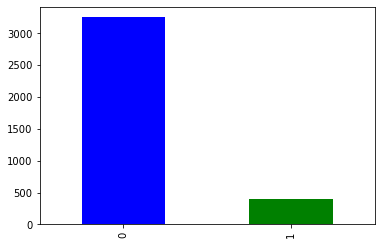

In [14]:
#Creating a bar chart
dyslexia.Dyslexia.value_counts().plot(kind="bar",color=["Blue","Green"]);

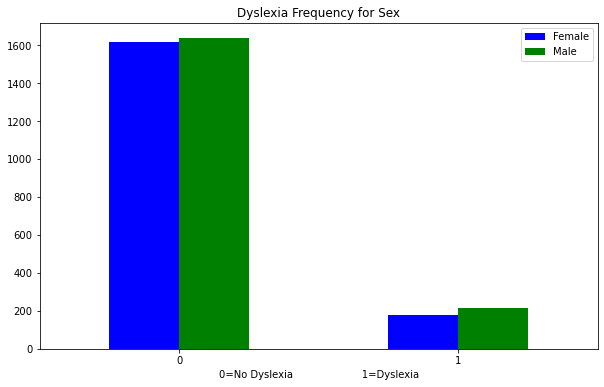

In [15]:
# Creating a plot for crosstab
pd.crosstab(dyslexia.Dyslexia,dyslexia.Gender).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["blue","green"])
plt.xlabel("0=No Dyslexia                      1=Dyslexia")
plt.title("Dyslexia Frequency for Sex")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

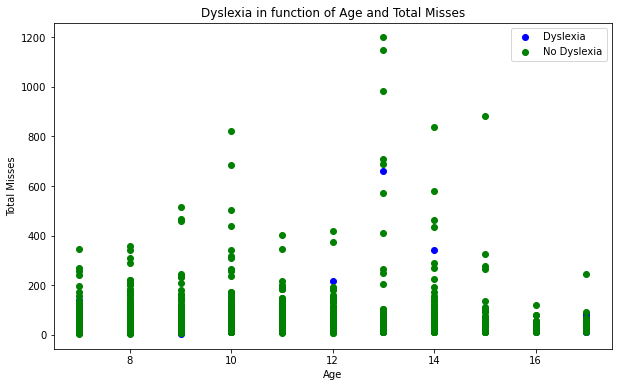

In [16]:
plt.figure(figsize=(10,6))
#Trying out positive examples
plt.scatter(dyslexia.Age[dyslexia.Dyslexia==1],
           dyslexia.MissesTotal[dyslexia.Dyslexia==1],c='blue')

#Trying out negative examples
plt.scatter(dyslexia.Age[dyslexia.Dyslexia==0],
           dyslexia.MissesTotal[dyslexia.Dyslexia==0],c="green")
plt.title("Dyslexia in function of Age and Total Misses")
plt.xlabel("Age")
plt.ylabel("Total Misses")
plt.legend(["Dyslexia","No Dyslexia"]);

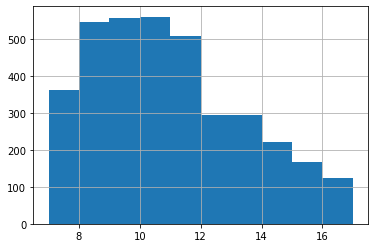

In [17]:
#Check the distribution of the Age with a histogram
dyslexia.Age.hist();

In [18]:
#Check for missing values in the dataset
dyslexia.isna().sum()

Gender         0
Nativelang     0
Otherlang      0
Age            0
Clicks1        0
              ..
Score32        0
Accuracy32     0
Missrate32     0
Dyslexia       0
MissesTotal    0
Length: 198, dtype: int64

## Modeling

In [19]:
X=dyslexia.drop("Dyslexia",axis=1)

In [20]:
y=dyslexia["Dyslexia"]

In [21]:
np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [22]:
models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and scores given Machine Learning Models.
    models : A dict of different Sckit-Learn Machine Learning Models
    X_train : Training Data (No labels)
    X_test : Testing Data (No labels)
    y_train : Training Labels
    y_test : Test Labels    
    """
    np.random.seed(42)
    model_scores={}
    #Loop through models
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [23]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9108367626886146,
 'KNN': 0.8943758573388203,
 'Random Forest': 0.897119341563786}

In [24]:
log_reg_grid={"C":np.logspace(-4,4,20),"max_iter":[100,160,180,200,250],"random_state":[42],
             "solver":["lbfgs","liblinear"]} 

gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-lea

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATION

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-lea

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: Conve

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: Conve

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: Conve

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 160, 180, 200, 250],
                         'random_state': [42],
                         'solver': ['lbfgs', 'liblinear']},
             verbose=True)

In [25]:
gs_log_reg.best_params_

{'C': 4.281332398719396,
 'max_iter': 100,
 'random_state': 42,
 'solver': 'liblinear'}

In [26]:
gs_log_reg.score(X_test,y_test)

0.9094650205761317